# Scraping

### GNews library in Python

Google news can be modified to look at older articles from [here](https://stackoverflow.com/questions/73072802/web-scraping-articles-from-google-news).


In [1]:
import sys
# !{sys.executable} -m pip install beautifulsoup4
# !{sys.executable} -m pip install newspaper3k
# !{sys.executable} -m pip install git+https://github.com/ranahaani/GNews.git

In [13]:
from gnews import GNews
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [14]:
# # example of using GNews

# google_news = GNews(language = 'en')
# google_headlines = google_news.get_news('Google') # top 100 search results for Google
# google_headlines = pd.dataframe(google_headlines)

# google_headlines['date'] = pd.to_datetime(google_headlines['published date'])
# min(google_headlines['date'])
# max(google_headlines['date'])

### Headlines for one company in one year

In [2]:
first_day = np.ones(12, dtype = int)
middle_day = np.repeat(15, 12)
middle_day[1] = 14 # feb
last_day = np.tile([31, 30], 6)
last_day[7:12] = last_day[0:5]
last_day[1] = 28 # feb

start_days = []
end_days = []

for i in range(12):
    
    start_days.append(first_day[i])
    end_days.append(middle_day[i])
    
    start_days.append(middle_day[i])
    end_days.append(last_day[i])

months = np.repeat(range(12), 2) + 1

In [ ]:
# scrape top 100 search results for keyword "Google" 
# for all 2-week periods in 2018

In [5]:
def get_headlines(year, keyword):
    """
    year: int 
    keyword: str, the company name
    """
    
    headlines_df = pd.DataFrame(columns = ["date", "title"])
    
    for two_week_period in range(24):
    
        month = months[two_week_period]
        start_day = start_days[two_week_period]
        end_day = end_days[two_week_period]

        start = dt.datetime(year, month, start_day)
        end = dt.datetime(year, month, end_day)

        gnews = GNews(language = "en",
                      start_date = start, 
                      end_date = end)

        news_df = pd.DataFrame(gnews.get_news(keyword))

        if news_df.shape == (0, 0):
            print(f"No news between {start} and {end} for {keyword}.\n")
            continue

        news_df['date'] = pd.to_datetime(news_df['published date'])

        headlines_df = pd.concat([headlines_df, news_df[['date', 'title']].copy()],
                                 ignore_index = True)
    
    return headlines_df

In [6]:
# example
# no news after present, which makes sense!

openai2023 = get_headlines(2023, "OpenAI")

No news between 2023-07-15 00:00:00 and 2023-07-31 00:00:00 for OpenAI.

No news between 2023-08-01 00:00:00 and 2023-08-15 00:00:00 for OpenAI.

No news between 2023-08-15 00:00:00 and 2023-08-31 00:00:00 for OpenAI.

No news between 2023-09-01 00:00:00 and 2023-09-15 00:00:00 for OpenAI.

No news between 2023-09-15 00:00:00 and 2023-09-30 00:00:00 for OpenAI.

No news between 2023-10-01 00:00:00 and 2023-10-15 00:00:00 for OpenAI.

No news between 2023-10-15 00:00:00 and 2023-10-31 00:00:00 for OpenAI.

No news between 2023-11-01 00:00:00 and 2023-11-15 00:00:00 for OpenAI.

No news between 2023-11-15 00:00:00 and 2023-11-30 00:00:00 for OpenAI.

No news between 2023-12-01 00:00:00 and 2023-12-15 00:00:00 for OpenAI.

No news between 2023-12-15 00:00:00 and 2023-12-31 00:00:00 for OpenAI.



In [10]:
# total news
print(openai2023.shape[0])

# check how many articles are outside of date range
print(sum(openai2023['date'] < 
          pd.to_datetime('2023-01-01').tz_localize('utc')))

# number of unique headlines
print(len(openai2023['title'].unique()))

# number of duplicates
print(sum(openai2023.duplicated()))

# headlines not including the keyword
openai2023.loc[~ openai2023['title'].str.contains('OpenAI', case = False)]

1270
0
1269
1


,date,title
0,2023-01-10 08:00:00+00:00,Microsoft reportedly plans to invest $10 billi...
1,2023-01-12 08:00:00+00:00,Microsoft Bets Big on the Creator of ChatGPT i...
4,2023-01-11 08:00:00+00:00,Waitlist opens for paid 'experimental' ChatGPT...
13,2023-01-15 08:00:00+00:00,Can artificial intelligence displace attorneys...
15,2023-01-07 08:00:00+00:00,"A New Area of A.I. Booms, Even Amid the Tech G..."
...,...,...
1264,2023-07-01 14:00:38+00:00,This Week's Awesome Tech Stories From Around t...
1265,2023-07-03 10:45:13+00:00,ZeroBot.ai: A Revolution in AI by John Alvarez...
1266,2023-07-03 20:45:06+00:00,Musk triggers controversy after imposing restr...
1268,2023-07-01 17:30:00+00:00,How to Block AI Chatbots From Scraping Your We...


# Collecting data

In [27]:
# refer to Retrieve headline data.ipynb ... it's just a for loop

No news between 2020-12-01 00:00:00 and 2020-12-15 00:00:00 for Twitter.

No news between 2020-12-15 00:00:00 and 2020-12-31 00:00:00 for Twitter.



KeyboardInterrupt: 

# After getting the data...

The `GNews` library can only retrieve like 10,000 headlines per day so I collected the data across a few days and saved them. 

In [3]:
google = pd.DataFrame(columns = ['date', 'title'])

for year in range(2018, 2023+1):
    filename_g = "headlines/" + str(year) + "_GOOG_headlines.csv"
    
    google = pd.concat([google, pd.read_csv(filename_g)],
                       ignore_index = True)
        
google['date'] = pd.to_datetime(google['date'])

In [4]:
google.head()

,date,title
0,2018-01-03 08:00:00+00:00,How to Optimize Job Listings for Google Search...
1,2018-01-10 08:00:00+00:00,Top Google recruiter: Google uses this 'shocki...
2,2018-01-11 08:00:00+00:00,"If you invested $1,000 in Google 10 years ago,..."
3,2018-01-11 08:00:00+00:00,"When It Comes to Gorillas, Google Photos Remai..."
4,2018-01-12 08:00:00+00:00,Changing Country Codes With Google - The New Y...


<Axes: >

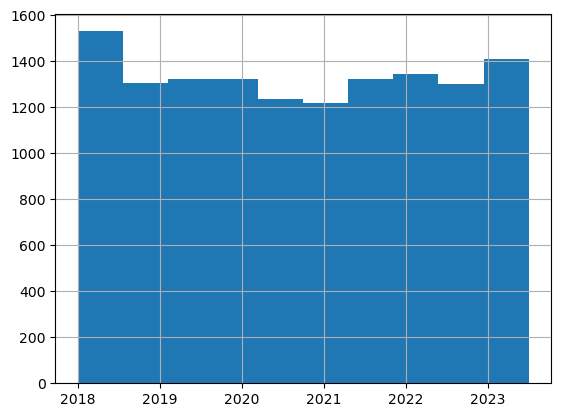

In [5]:
google['date'].hist()

In [6]:
# number of unique headlines

print(f"Unique headlines is {len(google['title'].unique())}")
print(f"Total headlines is {google.shape[0]}")
print(f"Number of headlines containing Google is {sum(pd.Series(google['title'].unique()).str.contains('google', case = False))}")
print(f"Number of duplicates is {sum(google.duplicated())}")

Unique headlines is 13105
Total headlines is 13317
Number of headlines containing Google is 12587
Number of duplicates is 200


In [7]:
# non Google headlines

google.loc[~ pd.Series(google['title']).str.contains('google', case = False)].head(10)

,date,title
44,2018-01-10 08:00:00+00:00,Adding Gmail Contacts to an iPad - The New Yor...
72,2018-01-02 08:00:00+00:00,Beijing to build $2 billion AI research park: ...
73,2018-01-04 08:00:00+00:00,Chrome is turning into the new Internet Explor...
84,2018-01-12 08:00:00+00:00,Captcha if you can: how you've been training A...
86,2018-01-10 08:00:00+00:00,Spectre: How reverse-engineering a microproces...
90,2018-01-03 08:00:00+00:00,U.S. should clear way for tech companies to he...
91,2018-01-05 08:00:00+00:00,Why Alphabet Inc. Stock Jumped 32.9% in 2017 -...
92,2018-01-03 08:00:00+00:00,"Tech, gadgets, and games we're looking forward..."
93,2018-01-09 08:00:00+00:00,Facebook video chat device Portal to cost $499...
94,2018-01-12 08:00:00+00:00,The big question hanging over the TV industry ...


# Clean headlines

Constrain to date range, remove headlines not containing the company name, and remove duplicates

In [8]:
def clean_headlines(df, keyword, start_date='2018-01-01', end_date='2023-12-31'):
    
    # standardize the hour, minute, and time to all be the same
    # will have to group by later
    df['date'] = df['date'].apply(lambda ts: ts.replace(hour=0, minute=0, second=0))
    
    # date range
    start = pd.to_datetime(start_date).tz_localize('utc')
    end = pd.to_datetime(end_date).tz_localize('utc')
    
    df = df.loc[(df['date'] >= start) & (df['date'] <= end)]
    
    # contains company name
    df = df.loc[pd.Series(df['title']).str.contains(keyword, case = False)]
    
    # remove duplicates
    df.drop_duplicates()
    
    # remove the 
    
    return(df)

In [9]:
google = clean_headlines(google, "Google")

### Which days do not have any headlines?

There are 132 days (out of the 4.5 years) that contain no headlines. 

In [11]:
full_dates = pd.date_range(start = '2018-01-01',
              end = '2023-07-01').tz_localize('utc')

google_dates = google.copy().set_index('date')

full_dates.difference(google_dates.index)

DatetimeIndex(['2018-01-13 00:00:00+00:00', '2018-01-21 00:00:00+00:00',
               '2018-01-31 00:00:00+00:00', '2018-02-03 00:00:00+00:00',
               '2018-02-17 00:00:00+00:00', '2018-02-28 00:00:00+00:00',
               '2018-03-04 00:00:00+00:00', '2018-03-31 00:00:00+00:00',
               '2018-04-15 00:00:00+00:00', '2018-05-13 00:00:00+00:00',
               ...
               '2023-05-07 00:00:00+00:00', '2023-05-14 00:00:00+00:00',
               '2023-05-21 00:00:00+00:00', '2023-06-03 00:00:00+00:00',
               '2023-06-04 00:00:00+00:00', '2023-06-16 00:00:00+00:00',
               '2023-06-17 00:00:00+00:00', '2023-06-18 00:00:00+00:00',
               '2023-06-19 00:00:00+00:00', '2023-06-24 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=132, freq=None)

Text(0.5, 1.0, 'days with 0 news articles about google')

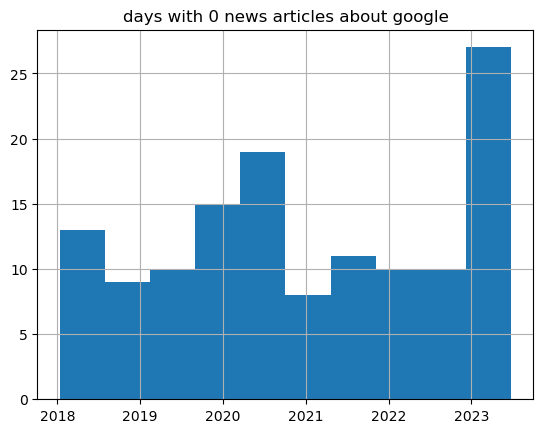

In [14]:
pd.DataFrame(full_dates.difference(google_dates.index)).hist()
plt.title("days with 0 news articles about google")

In [ ]:
# 132 out of 365*4.5 days are missing... can we just impute?

# could impute the scores with 0 positive, 0 negative, 1 neutral? no news = good news?
# and have 0 volume?

## Small interlude -- we may consider removing the source tag later.

In [50]:
longer = google['title'][google['title'].apply(lambda string: string.split(' - ')).apply(lambda x: len(x)) > 2][0:5]

for title in longer:
    
    split_title = title.split(' - ')
    n_splits = len(split_title) - 1
    
    print(f'\n Excluding {split_title[-1]}')
    print(' '.join(split_title[0:n_splits]))


 Excluding Express
Google Maps: Mystery woman appears on the street but where did she come from?

 Excluding Reuters
Google to open tech center near Lisbon, creating 500 jobs prime ...

 Excluding The Wall Street Journal
Of Furries and Fascism at Google WSJ

 Excluding Express
Google Maps: Mystery woman appears on the street but where did she come from?

 Excluding Reuters
Google to open tech center near Lisbon, creating 500 jobs prime ...


In [72]:
def remove_source_tag(headline):
    """
    after each headline, there is a " - [source name]" like " - New York Times". 
    
    this function removes the final occurence of " - ..."
    it doesn't perfectly remove the source tags, ie " - WSJ - The Wall Street Journal" becomes "WSJ"
    
    headline: string
    """
    
    split_title = headline.split(' - ')
    n_splits = len(split_title) - 1
    
    return(' '.join(split_title[0:n_splits]))
    
# example:

ex = google['title'][0:10].apply(lambda headline : remove_source_tag(headline))

for i in range(10):
    print(f"Longer headline: {google['title'][i]}")
    print(f"Shortened headline: {ex[i]}\n")

# for now, fixing this by also getting the publisher from gnews

Longer headline: How to Optimize Job Listings for Google Search - SHRM
Shortened headline: How to Optimize Job Listings for Google Search

Longer headline: Top Google recruiter: Google uses this 'shocking' strategy to hire the best employees - CNBC
Shortened headline: Top Google recruiter: Google uses this 'shocking' strategy to hire the best employees

Longer headline: If you invested $1,000 in Google 10 years ago, here’s how much you’d have now - CNBC
Shortened headline: If you invested $1,000 in Google 10 years ago, here’s how much you’d have now

Longer headline: When It Comes to Gorillas, Google Photos Remains Blind - WIRED
Shortened headline: When It Comes to Gorillas, Google Photos Remains Blind

Longer headline: Changing Country Codes With Google - The New York Times
Shortened headline: Changing Country Codes With Google

Longer headline: Google Memo Author Sues, Claiming Bias Against White ... - The New York Times
Shortened headline: Google Memo Author Sues, Claiming Bias Agai

# Add sentiment scores

use this tutorial for using Sentiment Intensity Analyzer
https://www.nltk.org/howto/sentiment.html

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amberlee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [84]:
# The source tag can matter! :( 

print(sid.polarity_scores('When It Comes to Gorillas, Google Photos Remains Blind - WIRED'))

print(sid.polarity_scores('When It Comes to Gorillas, Google Photos Remains Blind'))

{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.4019}
{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.4019}


In [16]:
for headline in google['title'][0:5]:
    sid = SentimentIntensityAnalyzer()
    print('\n')
    print(headline)
    ss = sid.polarity_scores(headline)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')

# is it a problem that the headline contains the source?



How to Optimize Job Listings for Google Search - SHRM
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 

Top Google recruiter: Google uses this 'shocking' strategy to hire the best employees - CNBC
compound: 0.7184, neg: 0.0, neu: 0.667, pos: 0.333, 

If you invested $1,000 in Google 10 years ago, here’s how much you’d have now - CNBC
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

When It Comes to Gorillas, Google Photos Remains Blind - WIRED
compound: -0.4019, neg: 0.231, neu: 0.769, pos: 0.0, 

Changing Country Codes With Google - The New York Times
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

In [80]:
def add_sentiment_scores(df):
    
    compound = []
    neg = []
    neu = []
    pos = []
    
    sid = SentimentIntensityAnalyzer()

    for headline in df['title']:
        # does this have to be initialized each time??
        sid = SentimentIntensityAnalyzer()
        ss = sid.polarity_scores(headline)

        compound.append(ss['compound'])
        neg.append(ss['neg'])
        neu.append(ss['neu'])
        pos.append(ss['pos'])
        
    df['compound'] = compound
    df['neg'] = neg
    df['neu'] = neu
    df['pos'] = pos
    
    return df

In [79]:
google = add_sentiment_scores(google)  

In [111]:
def wrangle_day(df):
    
    # number of unique days
    count_days = len(df['date'].unique())
    
    # number of headlines per day
    volume = df.groupby('date').count().iloc[0:count_days, 1]
    
    # take avg
    df = df.groupby('date').mean(numeric_only = True)
    df['volume'] = volume
    
    return df.reset_index().sort_values('date')
    

In [ ]:
# TO DO: figure out which days have 0 headlines!
# TO DO: check the shape of

In [112]:
google_day = wrangle_day(google)


## Check for missing days

In [113]:
missing_dates = pd.date_range(start = '2018-01-01',
                              end = '2023-07-01').tz_localize('utc'
                                                             ).difference(google_day.set_index('date').index)

In [141]:
print(len(missing_dates))

132


In [157]:
# sum(~ (google_day['date'][1027] <= missing_dates))
# missing_dates[68]
# google_day.iloc[1027]
# google_day.iloc[1028]

In [158]:
def impute_missing_headlines(df, start='2018-01-01', end='2023-07-01'):
    """
    df: avg sentiment score + volume per day
    """
    
    missing_dates = pd.date_range(start, end).tz_localize('utc'
                                                         ).difference(df.set_index('date').index)
    n_missing = len(missing_dates)
    
    no_headlines_df = pd.DataFrame({'date': missing_dates,
                                    'compound': np.zeros(n_missing),
                                    'neg': np.zeros(n_missing),
                                    'neu': np.ones(n_missing),
                                    'pos': np.zeros(n_missing),
                                    'volume': np.zeros(n_missing)})
    
    return pd.concat([df, no_headlines_df], ignore_index = True).sort_values('date')

In [160]:
google_day = impute_missing_headlines(google_day)

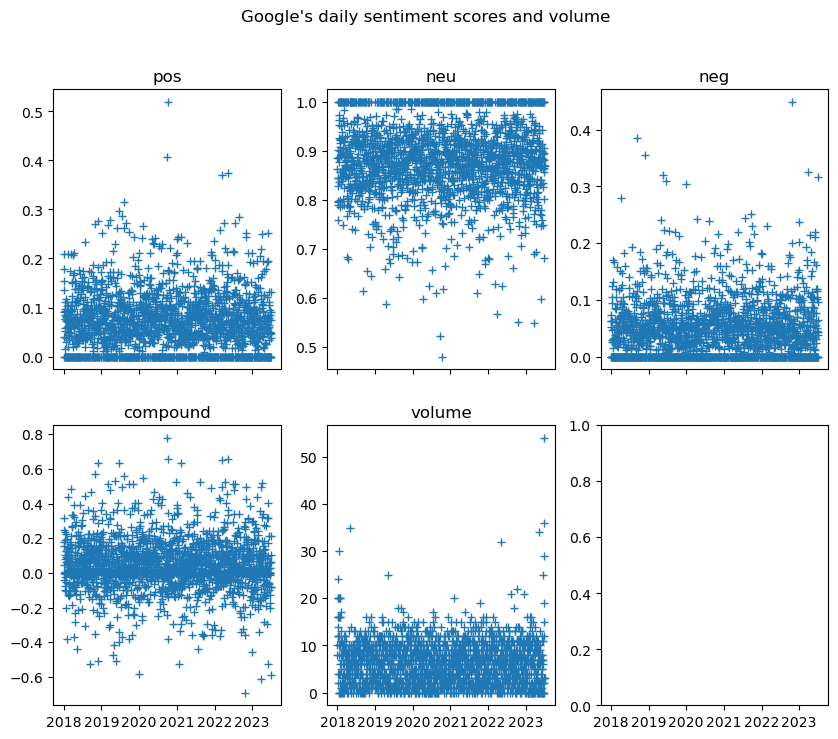

In [209]:
var_list = ['pos', 'neu', 'neg','compound', 'volume']

fig, axes = plt.subplots(nrows=2, ncols=3, 
                         figsize=(10, 8), sharex = True)

fig.suptitle('Google\'s daily sentiment scores and volume ')

# loop over elements in subplot and data, plot each one
for ax,var in zip(axes.flatten(), var_list):
    
    ax.plot(google_day['date'], google_day[var], "+")
    ax.title.set_text(var)
    
fig.savefig("google_daily.png")

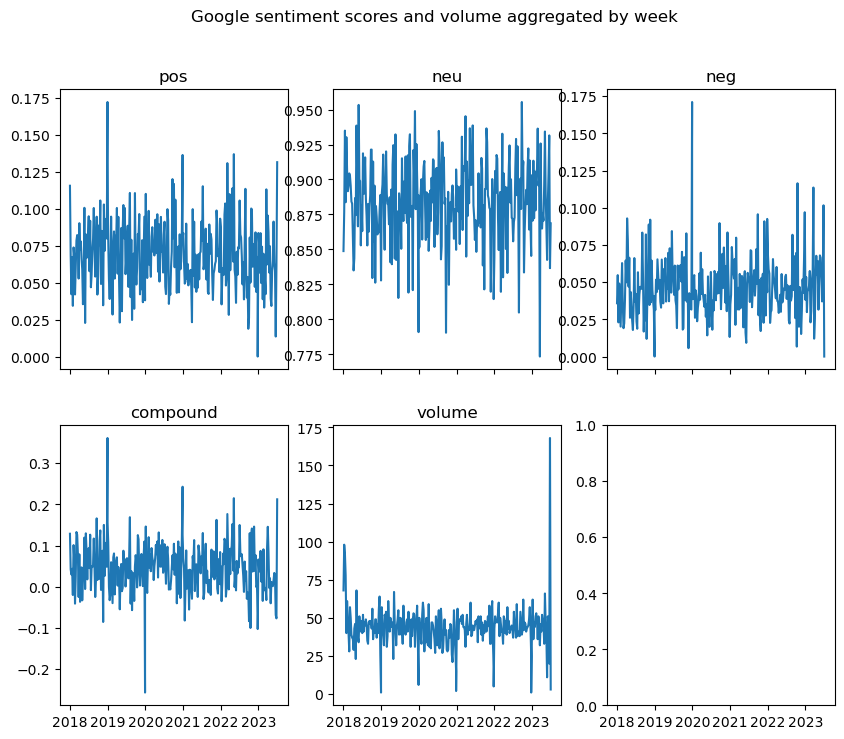

In [210]:
google_week = google_day.copy()
google_week['week'] = google_week['date'].dt.strftime('%Y %W')

google_week = google_week.groupby('week').agg({'pos': 'mean',
                                               'neu': 'mean',
                                               'neg':'mean',
                                               'compound': 'mean',
                                               'volume': 'sum'}).reset_index()

google_week['week'] = google_week['week'].apply(lambda week: 
                                                dt.datetime.strptime(week + ' 1',
                                                                     "%Y %W %w"))


fig, axes = plt.subplots(nrows=2, ncols=3, 
                         figsize=(10, 8), sharex = True)
fig.suptitle('Google sentiment scores and volume aggregated by week')

# loop over elements in subplot and data, plot each one
for ax,var in zip(axes.flatten(), var_list):
    
    ax.plot(google_week['week'], google_week[var])
    ax.title.set_text(var)
    
fig.savefig("google_weekly.png")

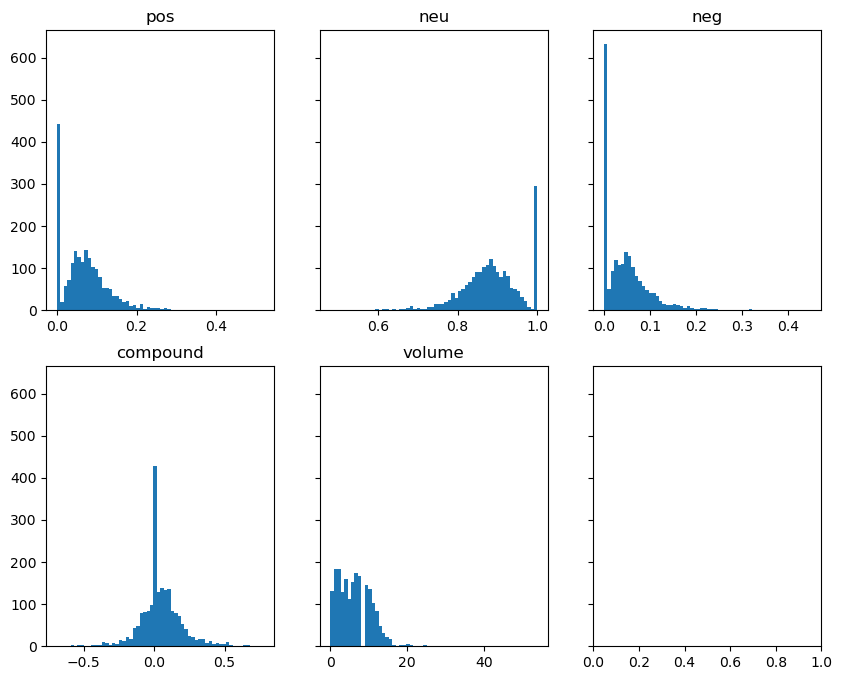

In [211]:
var_list = ['pos', 'neu', 'neg','compound', 'volume']
fig, axes = plt.subplots(nrows=2, ncols=3, 
                         figsize=(10, 8), sharey = True)

# loop over elements in subplot and data, plot each one
for ax,var in zip(axes.flatten(), var_list):
    
    ax.hist(google_day[var], bins = 60)
    ax.title.set_text(var)
    
fig.savefig("google_hist.png")


## Things that didn't work

#### Twitter API ([tutorial](https://towardsdatascience.com/an-extensive-guide-to-collecting-tweets-from-twitter-api-v2-for-academic-research-using-python-3-518fcb71df2a))

Actually, Twitter's API has a cap of 1,500 tweets per month. So that's a no go.

#### Reddit API

PRAW API seems to have higher limits. 
